In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-credit-score-classification-data/cleaned_train.csv


Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# conda install -c conda-forge xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
# plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import pickle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/cleaned-credit-score-classification-data/cleaned_train.csv")
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,24.785217,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,24.785217,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,24.785217,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,24.785217,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,24.785217,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [5]:
df.drop(columns=["Customer_ID"], inplace=True)

/tmp/ipykernel_98/1251077017.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=bool)),


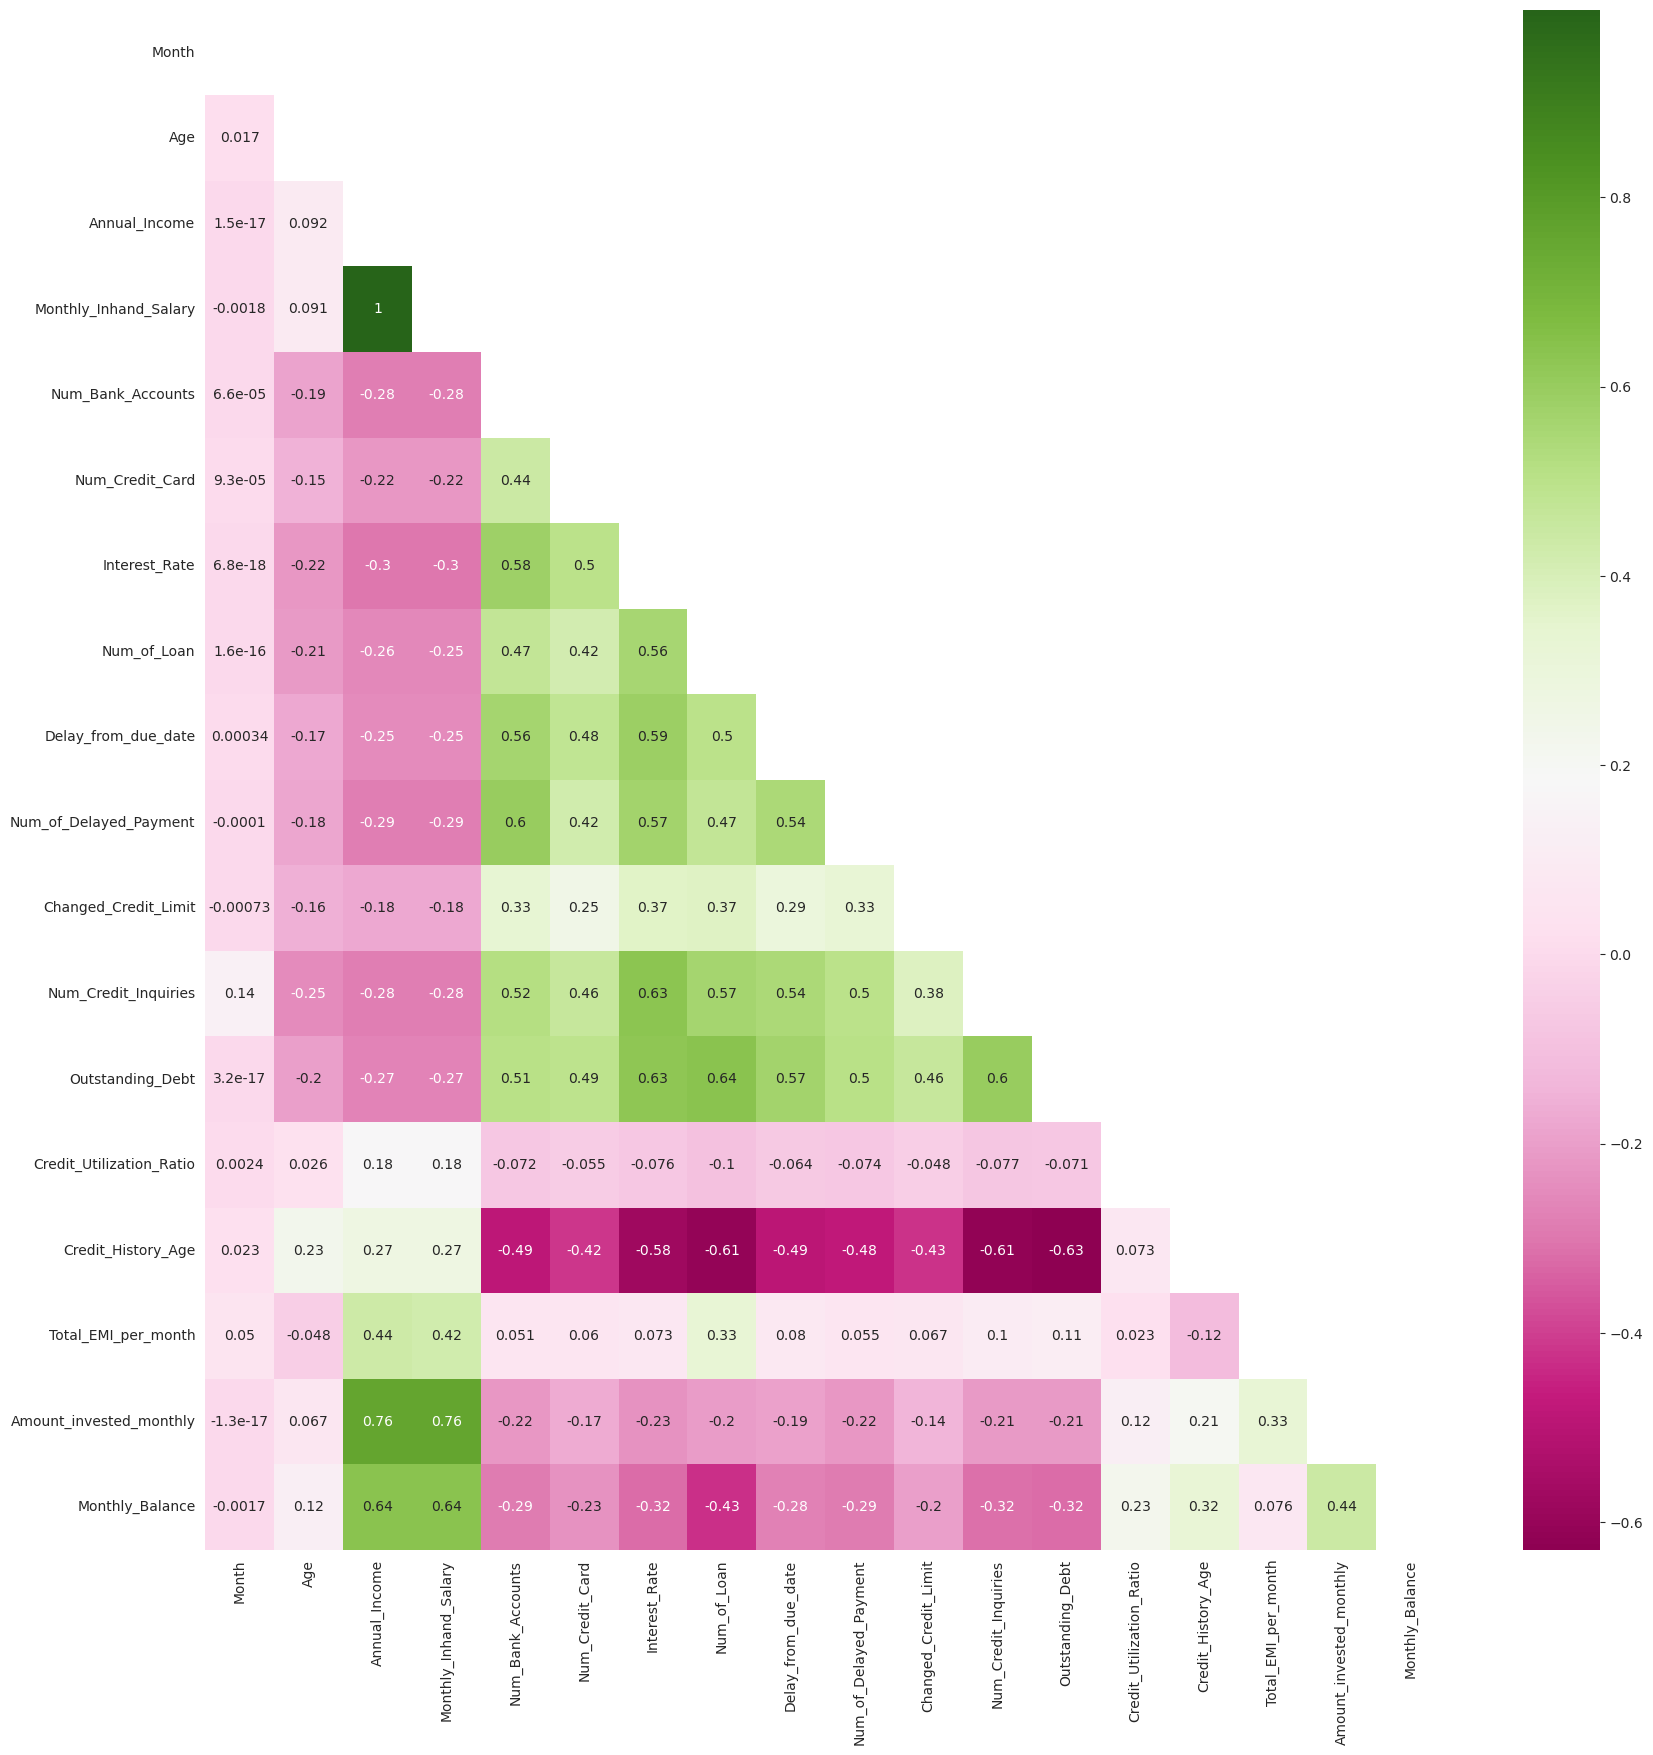

In [6]:
# Correlation between Numerical features
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
            annot=True, cmap="PiYG")
plt.show()

In [7]:
# Monthly in hand salary and anual income highly correlated

In [8]:
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 23)
(70000,)
(30000, 23)
(30000,)


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin): 
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep
        
    # Return self nothing else to do here
    def fit(self, X, y  = None): 
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]
        
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))            
            
        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self
    
    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))   

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)          
        return X_transformed
        
    # to get feature names    
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

# Explaination of above code

# 1

In [14]:
# ------------------------main code------------------
# object_cols       = X.select_dtypes(include="object").columns
# self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]

#---------------explaination-------------------------
# check for columns containing commas
d = [col for col in X_train.select_dtypes(include = "O").columns if X_train[col].str.contains(",", regex=True).any()]
d

['Type_of_Loan']

# 2

In [15]:
# Main code

# self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]

e = ["".join(map(lambda x: x[0], col.split("_")))  if "_" in col else col[:2] for col in d]
e

['ToL']

# setting basd to understand explaination 3

In [16]:
X["Occupation"].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [17]:
# working of get_dummies() is converting into onehot vectors
X["Occupation"].str.get_dummies()

,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
# working of get_dummies() in case when we have comma seperated values in rows.
X["Type_of_Loan"].str.get_dummies(sep=",")

,No Data,auto loan,credit-builder loan,debt consolidation loan,home equity loan,mortgage loan,not specified,payday loan,personal loan,student loan
0,0,1,1,0,1,0,0,0,1,0
1,0,1,1,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,0,1,0
3,0,1,1,0,1,0,0,0,1,0
4,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,0,0,0,0,0,1
99996,0,1,0,0,0,0,0,0,0,1
99997,0,1,0,0,0,0,0,0,0,1
99998,0,1,0,0,0,0,0,0,0,1


In [20]:
# just adding prefix in column names.
X["Type_of_Loan"].str.get_dummies(sep=",").add_prefix("ToL"+"_")

,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
0,0,1,1,0,1,0,0,0,1,0
1,0,1,1,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,0,1,0
3,0,1,1,0,1,0,0,0,1,0
4,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,0,0,0,0,0,1
99996,0,1,0,0,0,0,0,0,0,1
99997,0,1,0,0,0,0,0,0,0,1
99998,0,1,0,0,0,0,0,0,0,1


# 3

In [32]:
# main code
# for col, pre in zip(self.dummy_cols, self.dummy_prefix):
#             dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))
for col, pre in zip(d, e):
    f = X_train.join(X_train[col].str.get_dummies(sep=",").add_prefix(pre+"_"))

In [33]:
# main code
# dummy_X.drop(columns = self.dummy_cols, inplace=True)
f.drop(columns=["Type_of_Loan"])

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
76513,2,21.0,Manager,151649.360,12823.446667,3.0,7.0,11.0,3.0,7.0,...,0,0,0,0,0,0,1,1,1,0
60406,7,26.0,Accountant,100465.140,8279.095000,4.0,3.0,11.0,0.0,3.0,...,1,0,0,0,0,0,0,0,0,0
27322,3,37.0,Engineer,43395.090,3562.257500,1.0,3.0,4.0,3.0,11.0,...,0,0,1,1,1,0,0,0,0,0
53699,4,34.0,Lawyer,80661.320,6551.776667,5.0,4.0,30.0,4.0,8.0,...,0,0,1,1,0,0,1,0,0,0
65412,5,43.0,Scientist,81506.320,7012.193333,7.0,4.0,7.0,2.0,9.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,46.0,Developer,82065.160,6771.763333,5.0,5.0,3.0,3.0,12.0,...,0,1,0,0,1,0,1,0,0,0
54886,7,20.0,Accountant,14920.970,1424.414167,6.0,10.0,16.0,2.0,61.0,...,0,1,0,0,0,0,0,0,0,1
76820,5,38.0,Manager,66858.270,5770.522500,3.0,6.0,20.0,4.0,8.0,...,0,0,0,0,1,0,0,1,0,1
860,5,55.0,Doctor,19403.405,1904.950417,1.0,7.0,3.0,3.0,12.0,...,0,0,1,1,0,0,0,0,0,0


In [34]:
dummy = GetDummies()

X_train_dummy = dummy.fit_transform(X_train)
X_test_dummy   = dummy.transform(X_test)

In [35]:
X_train_dummy

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
76513,2,21.0,Manager,151649.360,12823.446667,3.0,7.0,11.0,3.0,7.0,...,0,0,0,0,0,0,1,1,1,0
60406,7,26.0,Accountant,100465.140,8279.095000,4.0,3.0,11.0,0.0,3.0,...,1,0,0,0,0,0,0,0,0,0
27322,3,37.0,Engineer,43395.090,3562.257500,1.0,3.0,4.0,3.0,11.0,...,0,0,1,1,1,0,0,0,0,0
53699,4,34.0,Lawyer,80661.320,6551.776667,5.0,4.0,30.0,4.0,8.0,...,0,0,1,1,0,0,1,0,0,0
65412,5,43.0,Scientist,81506.320,7012.193333,7.0,4.0,7.0,2.0,9.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,46.0,Developer,82065.160,6771.763333,5.0,5.0,3.0,3.0,12.0,...,0,1,0,0,1,0,1,0,0,0
54886,7,20.0,Accountant,14920.970,1424.414167,6.0,10.0,16.0,2.0,61.0,...,0,1,0,0,0,0,0,0,0,1
76820,5,38.0,Manager,66858.270,5770.522500,3.0,6.0,20.0,4.0,8.0,...,0,0,0,0,1,0,0,1,0,1
860,5,55.0,Doctor,19403.405,1904.950417,1.0,7.0,3.0,3.0,12.0,...,0,0,1,1,0,0,0,0,0,0


In [36]:
X_train_dummy.equals(f.drop(columns = ["Type_of_Loan"]))

True

# See above both the X_train_dummy from the main code and output from my code is same

In [37]:
for col, pre in zip(d, e):
    g = X_test.join(X_test[col].str.get_dummies(sep=",").add_prefix(pre+"_"))

In [38]:
X_test_dummy.equals(g.drop(columns = ["Type_of_Loan"]))

True

# same case with X_test_dummy

# Now just se the last piece of code in transform function

In [42]:
f_columns = f.drop(columns = ["Type_of_Loan"]).columns
f_columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'ToL_No Data', 'ToL_auto loan', 'ToL_credit-builder loan',
       'ToL_debt consolidation loan', 'ToL_home equity loan',
       'ToL_mortgage loan', 'ToL_not specified', 'ToL_payday loan',
       'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

In [45]:
f.drop(columns=["Type_of_Loan"])

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
76513,2,21.0,Manager,151649.360,12823.446667,3.0,7.0,11.0,3.0,7.0,...,0,0,0,0,0,0,1,1,1,0
60406,7,26.0,Accountant,100465.140,8279.095000,4.0,3.0,11.0,0.0,3.0,...,1,0,0,0,0,0,0,0,0,0
27322,3,37.0,Engineer,43395.090,3562.257500,1.0,3.0,4.0,3.0,11.0,...,0,0,1,1,1,0,0,0,0,0
53699,4,34.0,Lawyer,80661.320,6551.776667,5.0,4.0,30.0,4.0,8.0,...,0,0,1,1,0,0,1,0,0,0
65412,5,43.0,Scientist,81506.320,7012.193333,7.0,4.0,7.0,2.0,9.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,46.0,Developer,82065.160,6771.763333,5.0,5.0,3.0,3.0,12.0,...,0,1,0,0,1,0,1,0,0,0
54886,7,20.0,Accountant,14920.970,1424.414167,6.0,10.0,16.0,2.0,61.0,...,0,1,0,0,0,0,0,0,0,1
76820,5,38.0,Manager,66858.270,5770.522500,3.0,6.0,20.0,4.0,8.0,...,0,0,0,0,1,0,0,1,0,1
860,5,55.0,Doctor,19403.405,1904.950417,1.0,7.0,3.0,3.0,12.0,...,0,0,1,1,0,0,0,0,0,0


In [44]:
f.reindex(columns=f_columns, fill_value=0)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
76513,2,21.0,Manager,151649.360,12823.446667,3.0,7.0,11.0,3.0,7.0,...,0,0,0,0,0,0,1,1,1,0
60406,7,26.0,Accountant,100465.140,8279.095000,4.0,3.0,11.0,0.0,3.0,...,1,0,0,0,0,0,0,0,0,0
27322,3,37.0,Engineer,43395.090,3562.257500,1.0,3.0,4.0,3.0,11.0,...,0,0,1,1,1,0,0,0,0,0
53699,4,34.0,Lawyer,80661.320,6551.776667,5.0,4.0,30.0,4.0,8.0,...,0,0,1,1,0,0,1,0,0,0
65412,5,43.0,Scientist,81506.320,7012.193333,7.0,4.0,7.0,2.0,9.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,46.0,Developer,82065.160,6771.763333,5.0,5.0,3.0,3.0,12.0,...,0,1,0,0,1,0,1,0,0,0
54886,7,20.0,Accountant,14920.970,1424.414167,6.0,10.0,16.0,2.0,61.0,...,0,1,0,0,0,0,0,0,0,1
76820,5,38.0,Manager,66858.270,5770.522500,3.0,6.0,20.0,4.0,8.0,...,0,0,0,0,1,0,0,1,0,1
860,5,55.0,Doctor,19403.405,1904.950417,1.0,7.0,3.0,3.0,12.0,...,0,0,1,1,0,0,0,0,0,0


# working of reindex

In [46]:
# dummy dataframe
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200, 200, 404, 404, 301],
                  'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                  index=index)
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [47]:
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10',
             'Chrome']
df.reindex(new_index)
# see >> safari, chrome, IE10 were already present in original dataframe
# extra jo bhi aaya Icewaesel, comondo draon unki values hi nahi ha toh NaN aa gaya

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [49]:
# fill_value >> fillinf NaN
df.reindex(new_index, fill_value=0)

,http_status,response_time
Safari,404,0.07
Iceweasel,0,0.00
Comodo Dragon,0,0.00
IE10,404,0.08
Chrome,200,0.02


In [50]:
# redindexinf on basis on columns like we did in the Get_DUmmy function
df.reindex(columns=['http_status', 'user_agent'])
# http_status column was aleary there no issue
# user_agent >> extra colum so values ha nahi humari pass for the corrsponsoing index
# chrome index par user_agenet ki value humare purane wale dataframe me nahi ha so NAN.

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


# In our case 
1. self.columns >> comes from X_train
2. if the columns present in the X_test then no issue if columns not present in X_test(i.e some loans are not in X_test) the we get NaN and we fill them with 0
3. X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)